# Python - Data Analysis 
#### Python project: Analysis of donation and donor data for a non-profit organization.
#### Data cleaning and analysis, ETL processes, and visualization creation.

#### Using Pandas, Numpy, Matplotlib, Seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# טבלת נתוני תרומות FundingInfo 
fi = pd.read_excel(r'C:\Users\Omri\Desktop\Donations2023-Pro3.DB.xlsx', 'FundingInfo')
# טבלת קטגוריות של תורמים
cat = pd.read_excel(r'C:\Users\Omri\Desktop\Donations2023-Pro3.DB.xlsx', 'Categories')
# טבלת נתוני תורמים
donors = pd.read_excel(r'C:\Users\Omri\Desktop\Donations2023-Pro3.DB.xlsx', 'Donors')
# טבלת נתוני תרומות FundingInfo2 (לניתוח ספציפי)
fi2 = pd.read_excel(r'C:\Users\Omri\Desktop\Donations2023-Pro3.DB.xlsx', 'FundingInfo')

In [3]:
# fi -  הראשי עליו אעבוד DF מידע כללי על 

In [4]:
fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DonorName              20 non-null     object        
 1   DonorID                20 non-null     int64         
 2   GrantRequested         17 non-null     float64       
 3   GrantApproved          17 non-null     float64       
 4   FirstInstallment       16 non-null     float64       
 5   SecondInstallment      19 non-null     float64       
 6   GrantType              20 non-null     object        
 7   FirstInstallmentDate   16 non-null     datetime64[ns]
 8   SecondInstallmentDate  12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 1.5+ KB


In [5]:
fi.head()

,DonorName,DonorID,GrantRequested,GrantApproved,FirstInstallment,SecondInstallment,GrantType,FirstInstallmentDate,SecondInstallmentDate
0,Keren Ezvonot,15,500000.0,375000.0,375000.0,0.0,One-Time Grant,2023-08-30,NaT
1,Jewish Federation of North America,3,250000.0,250000.0,125000.0,125000.0,Continuation Grant,2023-03-10,2023-10-30
2,Beracha Foundation,5,300000.0,250000.0,50000.0,200000.0,Continuation Grant,2023-02-28,2023-09-30
3,Pratt Foundation,19,200000.0,200000.0,100000.0,100000.0,Continuation Grant,2023-01-31,2023-06-30
4,Governmental Appeals/Tenders,8,175000.0,175000.0,NaN,175000.0,One-Time Grant,NaT,2023-11-30


In [6]:
# fi מידע סטטיסטי על 

In [7]:
fi.drop (columns='DonorID').describe()

,GrantRequested,GrantApproved,FirstInstallment,SecondInstallment,FirstInstallmentDate,SecondInstallmentDate
count,17.000000,17.000000,16.000000,19.000000,16,12
mean,123647.058824,105000.000000,60312.500000,43157.894737,2023-04-27 01:30:00,2023-08-23 02:00:00
min,10000.000000,10000.000000,5000.000000,0.000000,2023-01-31 00:00:00,2023-04-30 00:00:00
25%,25000.000000,25000.000000,18750.000000,0.000000,2023-02-28 00:00:00,2023-07-07 12:00:00
50%,70000.000000,60000.000000,32500.000000,20000.000000,2023-03-12 12:00:00,2023-09-15 00:00:00
75%,175000.000000,175000.000000,46250.000000,52500.000000,2023-05-07 18:00:00,2023-10-03 00:00:00
max,500000.000000,375000.000000,375000.000000,200000.000000,2023-12-20 00:00:00,2023-11-30 00:00:00
std,132810.457597,106917.023902,89693.343306,62142.545059,NaN,NaN


In [8]:
# fi מידע סטטיסטי רק על העמודות המספריות ב

In [9]:
fi.describe(include = 'float64')

,GrantRequested,GrantApproved,FirstInstallment,SecondInstallment
count,17.000000,17.000000,16.000000,19.000000
mean,123647.058824,105000.000000,60312.500000,43157.894737
std,132810.457597,106917.023902,89693.343306,62142.545059
min,10000.000000,10000.000000,5000.000000,0.000000
25%,25000.000000,25000.000000,18750.000000,0.000000
50%,70000.000000,60000.000000,32500.000000,20000.000000
75%,175000.000000,175000.000000,46250.000000,52500.000000
max,500000.000000,375000.000000,375000.000000,200000.000000


In [10]:
# טיוב נתונים, הורדת עמודות לא רלוונטיות לניתוח ושינוי שמות לעמודות

In [11]:
fi.drop(columns=['GrantRequested','FirstInstallment','SecondInstallment'], inplace=True)
fi.rename(columns= {'GrantApproved':'TotalGrant2023'}, inplace=True)

fi.head()

,DonorName,DonorID,TotalGrant2023,GrantType,FirstInstallmentDate,SecondInstallmentDate
0,Keren Ezvonot,15,375000.0,One-Time Grant,2023-08-30,NaT
1,Jewish Federation of North America,3,250000.0,Continuation Grant,2023-03-10,2023-10-30
2,Beracha Foundation,5,250000.0,Continuation Grant,2023-02-28,2023-09-30
3,Pratt Foundation,19,200000.0,Continuation Grant,2023-01-31,2023-06-30
4,Governmental Appeals/Tenders,8,175000.0,One-Time Grant,NaT,2023-11-30


In [12]:
donors.head()

,DonorID,DonorName,Category,AgreementEndDate,Designation_Name,ContactName
0,1,Jgive,102,NaT,General Support,Adi Gal
1,2,Israel Toremet,102,2026-12-31,General Support,Efrat Walach
2,3,Jewish Federation of North America,101,2024-10-31,Climate March,Beth Cohen
3,4,Rashi Foundation,101,2025-03-31,Leadership Program,Michal Ben-Ami
4,5,Beracha Foundation,101,2024-12-31,General Support,Adi Brill


In [13]:
# ניקוי עמודות לא רלוונטיות לניתוח 

In [14]:
donors.drop(columns=['DonorName'], inplace=True)
cat.drop(columns='CategoryDescription', inplace=True)

In [15]:
fi.head()

,DonorName,DonorID,TotalGrant2023,GrantType,FirstInstallmentDate,SecondInstallmentDate
0,Keren Ezvonot,15,375000.0,One-Time Grant,2023-08-30,NaT
1,Jewish Federation of North America,3,250000.0,Continuation Grant,2023-03-10,2023-10-30
2,Beracha Foundation,5,250000.0,Continuation Grant,2023-02-28,2023-09-30
3,Pratt Foundation,19,200000.0,Continuation Grant,2023-01-31,2023-06-30
4,Governmental Appeals/Tenders,8,175000.0,One-Time Grant,NaT,2023-11-30


In [16]:
cat.head()

,CategoryID,CategoryName,CategoryType
0,101,Philanthropy Foundation,Earmarked
1,102,Private Donors,Non Earmarked
2,103,Municipal,Earmarked
3,104,Fundraising Event,Non Earmarked
4,105,Crowdfunding,Earmarked


In [17]:
cat.rename(columns={'CategoryID' : 'Category'}, inplace=True)

In [18]:
cat.head()

,Category,CategoryName,CategoryType
0,101,Philanthropy Foundation,Earmarked
1,102,Private Donors,Non Earmarked
2,103,Municipal,Earmarked
3,104,Fundraising Event,Non Earmarked
4,105,Crowdfunding,Earmarked


In [2]:
#  מיזוג בין דאטה-פריים'ס    

In [20]:
mrg1 = pd.merge(donors,
                cat,
                on = 'Category',
                how = 'right')
mrg = pd.merge(mrg1,
               fi,
               on = 'DonorID',
               how = 'right')
mrg['DonorID'] = mrg['DonorID'].astype(int) 

In [21]:
mrg.head()

,DonorID,Category,AgreementEndDate,Designation_Name,ContactName,CategoryName,CategoryType,DonorName,TotalGrant2023,GrantType,FirstInstallmentDate,SecondInstallmentDate
0,15,106,NaT,Recovery of Haifa Bay,NaN,Governmental,Earmarked,Keren Ezvonot,375000.0,One-Time Grant,2023-08-30,NaT
1,3,101,2024-10-31,Climate March,Beth Cohen,Philanthropy Foundation,Earmarked,Jewish Federation of North America,250000.0,Continuation Grant,2023-03-10,2023-10-30
2,5,101,2024-12-31,General Support,Adi Brill,Philanthropy Foundation,Earmarked,Beracha Foundation,250000.0,Continuation Grant,2023-02-28,2023-09-30
3,19,101,2024-12-31,Training Activities,Tamar Benbinisti,Philanthropy Foundation,Earmarked,Pratt Foundation,200000.0,Continuation Grant,2023-01-31,2023-06-30
4,8,106,NaT,Training Activities,NaN,Governmental,Earmarked,Governmental Appeals/Tenders,175000.0,One-Time Grant,NaT,2023-11-30


In [22]:
# סכום המענק הכולל לפי קטגוריות

In [23]:
TotalGrantPerCat = mrg.groupby('CategoryName')['TotalGrant2023'].sum()
TotalGrantPerCat.sort_values(ascending=False)

CategoryName
Philanthropy Foundation    935000.0
Governmental               550000.0
Private Donors             270000.0
Municipal                   30000.0
Crowdfunding                    0.0
Fundraising Event               0.0
Name: TotalGrant2023, dtype: float64

In [24]:
# ניקוי נתונים

In [25]:
TotalGrantPerCat = TotalGrantPerCat.sort_values(ascending=False).iloc[:4]

TotalGrantPerCat.head()

CategoryName
Philanthropy Foundation    935000.0
Governmental               550000.0
Private Donors             270000.0
Municipal                   30000.0
Name: TotalGrant2023, dtype: float64

## A pie chart illustrating the distribution of grants by categories in 2023

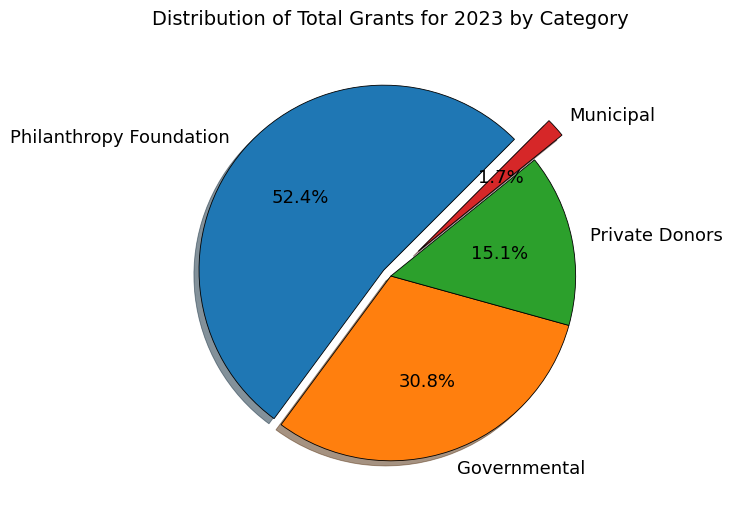

In [26]:
plt.figure(figsize=(6, 6), dpi=100)

plt.pie(TotalGrantPerCat,
        labels=TotalGrantPerCat.index,
        autopct='%1.1f%%',
        colors=sb.color_palette('tab10'),
        textprops={'fontsize':13},
        startangle=45,
        explode=(0.05,0,0,0.2),
        shadow=True,
        wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.6, 
                      'antialiased': True}) 

plt.title('Distribution of Total Grants for 2023 by Category'
          ,fontdict={"fontsize":14},
          pad=15)

plt.show()

In [27]:
donors.head()

,DonorID,Category,AgreementEndDate,Designation_Name,ContactName
0,1,102,NaT,General Support,Adi Gal
1,2,102,2026-12-31,General Support,Efrat Walach
2,3,101,2024-10-31,Climate March,Beth Cohen
3,4,101,2025-03-31,Leadership Program,Michal Ben-Ami
4,5,101,2024-12-31,General Support,Adi Brill


In [28]:
fi.head()

,DonorName,DonorID,TotalGrant2023,GrantType,FirstInstallmentDate,SecondInstallmentDate
0,Keren Ezvonot,15,375000.0,One-Time Grant,2023-08-30,NaT
1,Jewish Federation of North America,3,250000.0,Continuation Grant,2023-03-10,2023-10-30
2,Beracha Foundation,5,250000.0,Continuation Grant,2023-02-28,2023-09-30
3,Pratt Foundation,19,200000.0,Continuation Grant,2023-01-31,2023-06-30
4,Governmental Appeals/Tenders,8,175000.0,One-Time Grant,NaT,2023-11-30


In [3]:
# מיזוג בין דאטה-פריים'ס

In [30]:
mrg_donors_fi = pd.merge(donors,
               fi,
               on = 'DonorID',
               how = 'left')

mrg_donors_fi = mrg_donors_fi[['Designation_Name', 'TotalGrant2023']].dropna()
mrg_donors_fi.drop(mrg_donors_fi[mrg_donors_fi['TotalGrant2023'] < 30000].index, inplace = True)

TotalGrantsPerDesignation = mrg_donors_fi.groupby(['Designation_Name'])['TotalGrant2023'].sum().astype(int)

TotalGrantsPerDesignation

Designation_Name
Climate March            280000
General Support          420000
Leadership Program        50000
Recovery of Haifa Bay    375000
Training Activities      445000
Volunteers               130000
Name: TotalGrant2023, dtype: int32

## A pie chart illustrating the distribution of grants by allocation for the year 2023

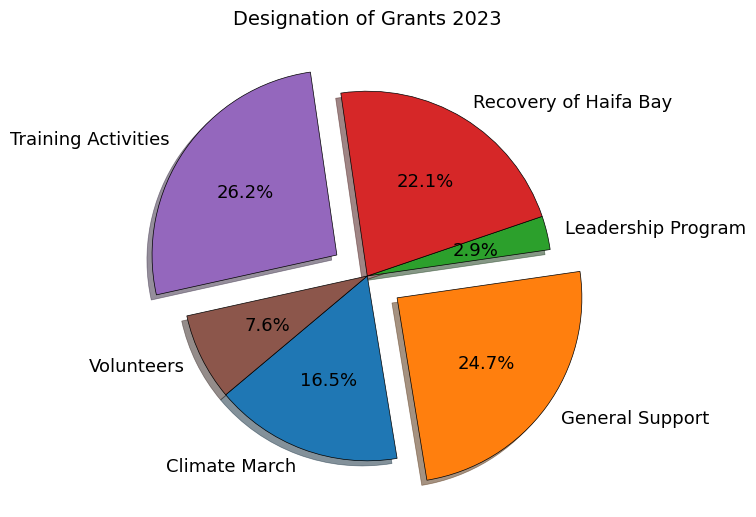

In [31]:
plt.figure(figsize=(6, 6), dpi=100)

plt.pie(TotalGrantsPerDesignation,
        labels=TotalGrantsPerDesignation.index,
        autopct='%1.1f%%',
        colors=sb.color_palette('tab10'),
        textprops={'fontsize':13},
        startangle=220,
        explode= (0,0.2,0,0,0.2,0),
        shadow=True,
        wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.5, 
                      'antialiased': True}) 

plt.title('Designation of Grants 2023'
          ,fontdict={"fontsize":14},
          pad=15)

plt.show()

In [32]:
donors

,DonorID,Category,AgreementEndDate,Designation_Name,ContactName
0,1,102,NaT,General Support,Adi Gal
1,2,102,2026-12-31,General Support,Efrat Walach
2,3,101,2024-10-31,Climate March,Beth Cohen
3,4,101,2025-03-31,Leadership Program,Michal Ben-Ami
4,5,101,2024-12-31,General Support,Adi Brill
5,6,101,NaT,Public Transportaion Program,Anat Dror
6,7,101,2024-05-31,Training Activities,Leora Shavit
7,8,106,NaT,Training Activities,NaN
8,9,103,2025-03-31,Climate March,Adi Ashkenazi
9,10,105,NaT,Renewable Energy Program,Yossef Roash


## Total grants by donor for the year 2023

In [33]:
# ניקוי נתונים 

In [34]:
fi1 = fi.sort_values(by='TotalGrant2023', ascending=False).iloc[:17]


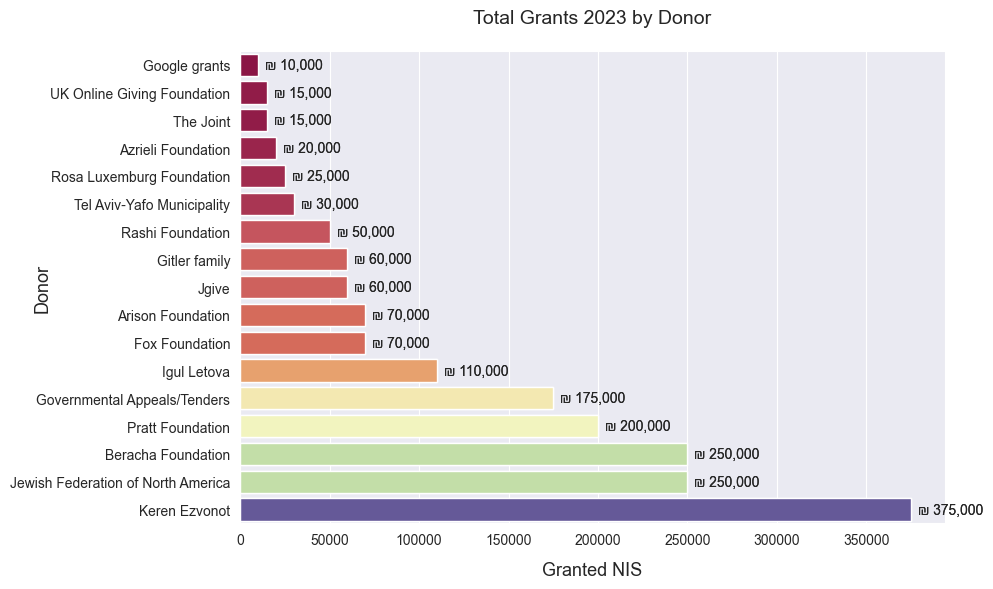

In [35]:
plt.figure(figsize=(10, 6))

total_grant_by_donor = fi1.groupby('DonorName')['TotalGrant2023'].sum().sort_values()

sb.set_style("darkgrid")

sb.barplot(data=fi1,
           x=total_grant_by_donor.values,
           y=total_grant_by_donor.index, 
           hue=total_grant_by_donor, 
           palette= 'Spectral', 
           legend=False)

plt.title('Total Grants 2023 by Donor',fontdict={"fontsize":14}, pad=20)

plt.xlabel('Granted NIS', fontsize = 13, labelpad=10 )
plt.ylabel('Donor', fontsize = 13, labelpad=  -30)

ax = sb.barplot(data=fi1,
                x=total_grant_by_donor.values, 
                y=total_grant_by_donor.index, 
                hue=total_grant_by_donor, 
                palette= 'Spectral', 
                legend=False)

for c in ax.containers:
    ax.bar_label(c, fmt='₪ {:,.0f}', fontsize=10, padding= 5)

plt.tight_layout()
plt.show()

In [36]:
fi2 = fi2[['FirstInstallment', 'SecondInstallment', 'FirstInstallmentDate', 'SecondInstallmentDate']]
fi2['TotalGrant2023'] = fi2['FirstInstallment']+fi2['SecondInstallment']


fi2.head()

,FirstInstallment,SecondInstallment,FirstInstallmentDate,SecondInstallmentDate,TotalGrant2023
0,375000.0,0.0,2023-08-30,NaT,375000.0
1,125000.0,125000.0,2023-03-10,2023-10-30,250000.0
2,50000.0,200000.0,2023-02-28,2023-09-30,250000.0
3,100000.0,100000.0,2023-01-31,2023-06-30,200000.0
4,NaN,175000.0,NaT,2023-11-30,NaN


In [37]:
# מחיקת עמודות לא רלוונטיות לניתוח ואיחוד נתונים

In [38]:
fi20 = fi2[['FirstInstallmentDate','FirstInstallment']].dropna()
fi20.reset_index(inplace=True)
fi20 = fi20[['FirstInstallmentDate', 'FirstInstallment']]

fi20.rename(columns={'FirstInstallmentDate': 'Date', 'FirstInstallment': 'Funds'}, inplace=True)



fi20.head()

,Date,Funds
0,2023-08-30,375000.0
1,2023-03-10,125000.0
2,2023-02-28,50000.0
3,2023-01-31,100000.0
4,2023-03-15,40000.0


In [39]:
fi21 = fi2[['SecondInstallmentDate', 'SecondInstallment']].dropna()
fi21.reset_index(inplace=True)
fi21 = fi21[['SecondInstallmentDate', 'SecondInstallment']]

fi21.rename(columns={'SecondInstallmentDate': 'Date', 'SecondInstallment': 'Funds'}, inplace=True)

fi21.head()

,Date,Funds
0,2023-10-30,125000.0
1,2023-09-30,200000.0
2,2023-06-30,100000.0
3,2023-11-30,175000.0
4,2023-08-03,70000.0


In [40]:
# טיוב ואיחוד נתונים

In [41]:
union_fi = pd.concat([fi20, fi21], ignore_index=True)
union_fi['Quarter'] = 'Q'+ union_fi['Date'].dt.quarter.fillna(0).astype(str)
union_fi["Year"]=union_fi["Date"].dt.year
union_fi["Month"]=union_fi["Date"].dt.month
union_fi["Day"]=union_fi["Date"].dt.day

#union_fi[['YY', 'MM', 'DD']] = union_fi['Date'].astype('str').str.split('-',expand=True)

union_fi.head()

,Date,Funds,Quarter,Year,Month,Day
0,2023-08-30,375000.0,Q3,2023,8,30
1,2023-03-10,125000.0,Q1,2023,3,10
2,2023-02-28,50000.0,Q1,2023,2,28
3,2023-01-31,100000.0,Q1,2023,1,31
4,2023-03-15,40000.0,Q1,2023,3,15


## A chart displaying the monthly average of received funds alongside the overall monthly average

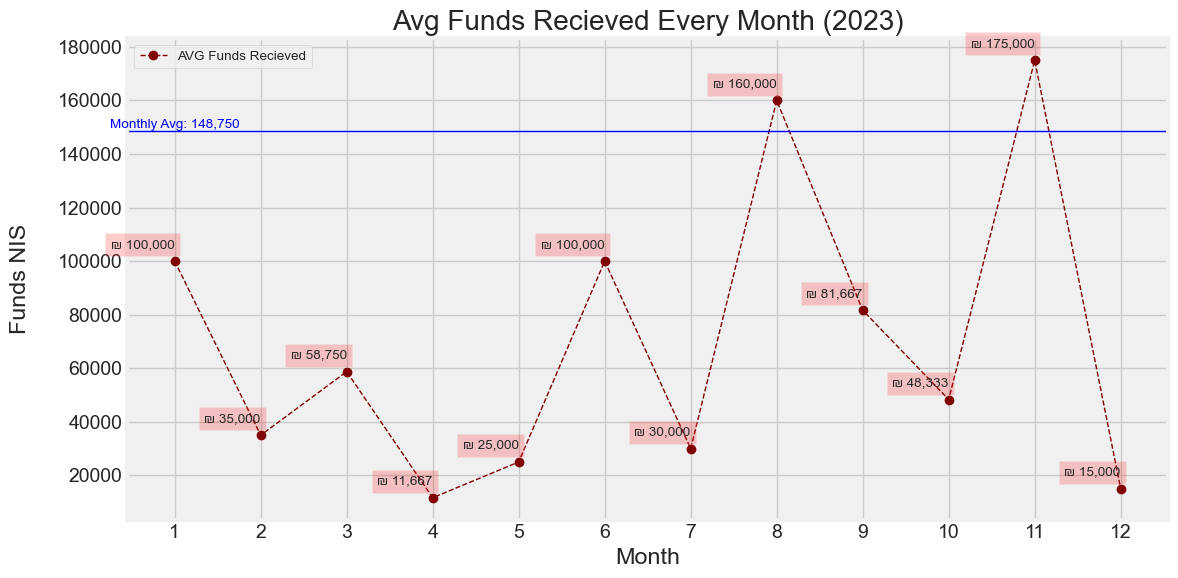

In [42]:
avg_monthly_grants = union_fi.groupby(['Month'])[['Funds']].mean()
overall_avg = union_fi['Funds'].sum()/12

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

plt.plot(avg_monthly_grants.index, avg_monthly_grants['Funds'],
         marker='o',
         linestyle='--',
         color='maroon',
         linewidth=1
        )

plt.axhline(y=overall_avg, color='blue', linestyle='-', linewidth=1, label=f'Overall Avg: {overall_avg:,.0f}')
plt.text(1, overall_avg + 2, f'Monthly Avg: {overall_avg:,.0f}', color='blue', ha='center', va='bottom', fontsize= 'x-small')



for i, value in enumerate(avg_monthly_grants['Funds']):
    plt.text(avg_monthly_grants.index[i], value+5000, f'₪ {value:,.0f}',fontsize ='x-small', ha='right',ma='right', bbox = dict(facecolor = 'red', alpha = 0.2))

plt.title('Avg Funds Recieved Every Month (2023)')
plt.xlabel('Month')
plt.ylabel('Funds NIS', labelpad= 20 )
plt.grid(True)
plt.xticks(avg_monthly_grants.index)
plt.legend(['AVG Funds Recieved'], loc='upper left', fontsize='x-small')

plt.tight_layout()
plt.show()

## A chart displaying the total funds received by quarter in 2023

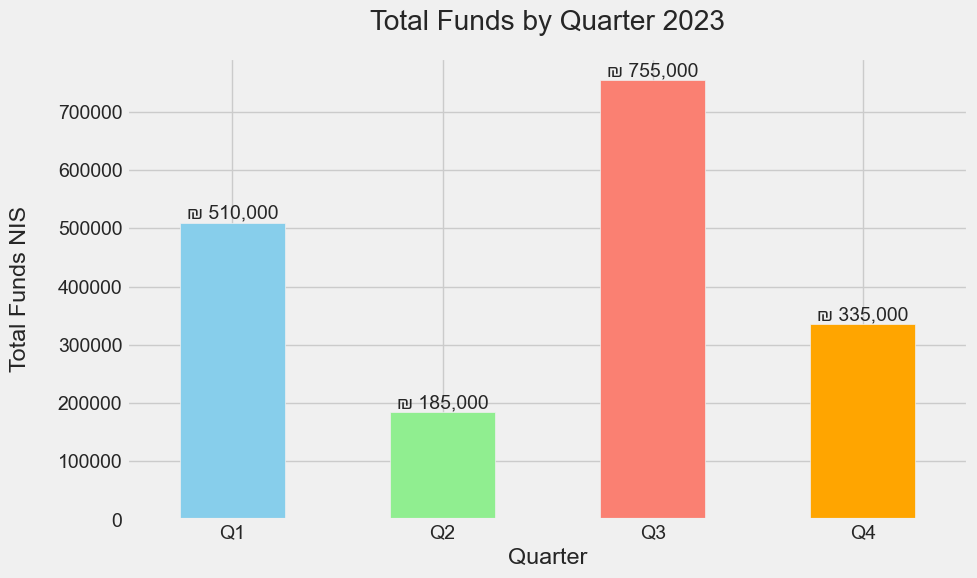

In [43]:
plt.figure(figsize=(10, 6))
sum_by_quarter = union_fi.groupby('Quarter')['Funds'].sum()
sum_by_quarter = sum_by_quarter.astype(int)

sum_by_quarter.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange'])

for i, total in enumerate(sum_by_quarter):
    plt.text(i, total + 5, f'₪ {total:,.0f}', ha='center', va='bottom')


plt.title('Total Funds by Quarter 2023', pad= 20, loc='center')
plt.xlabel('Quarter')
plt.ylabel('Total Funds NIS', labelpad= 20)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()